In [1]:
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data import get_tokenizer 
from torch.utils.data import DataLoader
from tqdm import tqdm

import torch
import torch.nn as nn 

/Users/user/source/python/llm/hugging-face-transformers/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = get_tokenizer("basic_english")

In [3]:
toy_data = """I wish I was little bit taller
I wish I was a baller
She wore a small black dress to the party
The dog chased a big red ball in the park
He had a huge smile on his face when he won the race
The tiny kitten played with a fluffy toy mouse
The team celebrated their victory with a grand parade
She bought a small, delicate necklace for her sister
The mountain peak stood majestic and tall against the clear blue sky
The toddler took small, careful steps as she learned to walk
The house had a spacious backyard with a big swimming pool
He felt a sense of accomplishment after completing the challenging puzzle
The chef prepared a delicious, flavorful dish using fresh ingredients
The children played happily in the small, cozy room
The book had an enormous impact on readers around the world
The wind blew gently, rustling the leaves of the tall trees
She painted a beautiful, intricate design on the small canvas
The concert hall was filled with thousands of excited fans
The garden was adorned with colorful flowers of all sizes
I hope to achieve great success in my chosen career path
The skyscraper towered above the city, casting a long shadow
He gazed in awe at the breathtaking view from the mountaintop
The artist created a stunning masterpiece with bold brushstrokes
The baby took her first steps, a small milestone that brought joy to her parents
The team put in a tremendous amount of effort to win the championship
The sun set behind the horizon, painting the sky in vibrant colors
The professor gave a fascinating lecture on the history of ancient civilizations
The house was filled with laughter and the sound of children playing
She received a warm, enthusiastic welcome from the audience
The marathon runner had incredible endurance and determination
The child's eyes sparkled with excitement upon opening the gift
The ship sailed across the vast ocean, guided by the stars
The company achieved remarkable growth in a short period of time
The team worked together harmoniously to complete the project
The puppy wagged its tail, expressing its happiness and affection
She wore a stunning gown that made her feel like a princess
The building had a grand entrance with towering columns
The concert was a roaring success, with the crowd cheering and clapping
The baby took a tiny bite of the sweet, juicy fruit
The athlete broke a new record, achieving a significant milestone in her career
The sculpture was a masterpiece of intricate details and craftsmanship
The forest was filled with towering trees, creating a sense of serenity
The children built a small sandcastle on the beach, their imaginations running wild
The mountain range stretched as far as the eye could see, majestic and awe-inspiring
The artist's brush glided smoothly across the canvas, creating a beautiful painting
She received a small token of appreciation for her hard work and dedication
The orchestra played a magnificent symphony that moved the audience to tears
The flower bloomed in vibrant colors, attracting butterflies and bees
The team celebrated their victory with a big, extravagant party
The child's laughter echoed through the small room, filling it with joy
The sunflower stood tall, reaching for the sky with its bright yellow petals
The city skyline was dominated by tall buildings and skyscrapers
The cake was adorned with a beautiful, elaborate design for the special occasion
The storm brought heavy rain and strong winds, causing widespread damage
The small boat sailed peacefully on the calm, glassy lake
The artist used bold strokes of color to create a striking and vivid painting
The couple shared a passionate kiss under the starry night sky
The mountain climber reached the summit after a long and arduous journey
The child's eyes widened in amazement as the magician performed his tricks
The garden was filled with the sweet fragrance of blooming flowers
The basketball player made a big jump and scored a spectacular slam dunk
The cat pounced on a small mouse, displaying its hunting instincts
The mansion had a grand entrance with a sweeping staircase and chandeliers
The raindrops fell gently, creating a rhythmic patter on the roof
The baby took a big step forward, encouraged by her parents' applause
The actor delivered a powerful and emotional performance on stage
The butterfly fluttered its delicate wings, mesmerizing those who watched
The company launched a small-scale advertising campaign to test the market
The building was constructed with strong, sturdy materials to withstand earthquakes
The singer's voice was powerful and resonated throughout the concert hall
The child built a massive sandcastle with towers, moats, and bridges
The garden was teeming with a variety of small insects and buzzing bees
The athlete's muscles were well-developed and strong from years of training
The sun cast long shadows as it set behind the mountains
The couple exchanged heartfelt vows in a beautiful, intimate ceremony
The dog wagged its tail vigorously, a sign of excitement and happiness
The baby let out a tiny giggle, bringing joy to everyone around"""


In [4]:
def tokenize_data(sentences):
    for sentence in sentences:
        yield tokenizer(sentence)


In [5]:
tokenized_toy_data = tokenizer(toy_data)

In [6]:
type(tokenized_toy_data)

list

In [7]:
for i, t in enumerate(tokenized_toy_data):
    print(t)
    if i == 10:
        break

i
wish
i
was
little
bit
taller
i
wish
i
was


In [8]:
vocab = build_vocab_from_iterator(tokenize_data(tokenized_toy_data), specials=['<unk>'])
vocab.set_default_index(vocab["<unk>"])


In [9]:
vocab.get_stoi()

{'yellow': 426,
 'work': 422,
 'won': 421,
 'withstand': 420,
 'win': 416,
 'wild': 415,
 'widespread': 414,
 'widened': 413,
 'who': 412,
 'when': 411,
 'well-developed': 409,
 'warm': 406,
 'vigorously': 401,
 'view': 400,
 'variety': 398,
 'using': 397,
 'adorned': 49,
 'used': 396,
 'under': 394,
 'far': 217,
 'tricks': 393,
 'upon': 395,
 'bite': 137,
 'training': 391,
 'affection': 117,
 'toy': 390,
 'campaign': 159,
 'towers': 389,
 'glided': 238,
 'token': 387,
 'together': 386,
 'toddler': 385,
 'throughout': 383,
 'columns': 179,
 'through': 382,
 'actor': 115,
 'teeming': 378,
 'tears': 377,
 'taller': 376,
 'fragrance': 230,
 'symphony': 375,
 'swimming': 374,
 'mountaintop': 283,
 'thousands': 381,
 'sweeping': 373,
 'tremendous': 392,
 'summit': 371,
 'sturdy': 370,
 'stretched': 367,
 'step': 365,
 'stars': 364,
 'starry': 363,
 'staircase': 362,
 'special': 359,
 'cozy': 184,
 'smoothly': 355,
 'smile': 354,
 'small-scale': 353,
 'stage': 361,
 'constructed': 182,
 'sky

In [10]:
# Test
sample_sentence = "I wish I was a baller"
tokenized_sample = tokenizer(sample_sentence)
tokenized_sample

['i', 'wish', 'i', 'was', 'a', 'baller']

In [11]:
encoded_sample = [vocab[token] for token in tokenized_sample]
print("Encoded sample:", encoded_sample)

Encoded sample: [20, 108, 20, 7, 2, 133]


In [12]:
print(f"unknown token in the vocab:{vocab['lamdba']}") # doesn't exist in the vocab
print(f"type:{type((vocab['lambda']))}")
print(f"special character in the vocab for unknown token={vocab.lookup_token(vocab['lambda'])}")

unknown token in the vocab:0
type:<class 'int'>
special character in the vocab for unknown token=<unk>


In [13]:
print(len(tokenized_toy_data))

894


In [14]:
CONTEXT_SIZE = 2
cobow_data = []
# modified code
tokenized_data_len = len(tokenized_toy_data)
for i in range(CONTEXT_SIZE, tokenized_data_len - CONTEXT_SIZE):
    context = (
        [tokenized_toy_data [i - CONTEXT_SIZE + j] for j in range(CONTEXT_SIZE)]
        + [tokenized_toy_data [i + j + 1] for j in range(CONTEXT_SIZE)]
    )

    target = tokenized_toy_data [i]
    cobow_data.append((context, target))
    

In [15]:
cobow_data[2]

(['i', 'was', 'bit', 'taller'], 'little')

In [16]:
len(cobow_data)

890

In [17]:
cobow_data[880]

(['happiness', 'the', 'let', 'out'], 'baby')

In [18]:
text_pipeline = lambda tokens:[ vocab[token]  for token in tokens]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    target_list, context_list, offsets = [], [], [0]
    for _context, _target in batch:
        target_list.append(vocab[_target])  
        processed_context = torch.tensor(text_pipeline(_context), dtype=torch.int64)
        context_list.append(processed_context)
        offsets.append(processed_context.size(0))
    target_list = torch.tensor(target_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    context_list = torch.cat(context_list)
    return target_list.to(device), context_list.to(device), offsets.to(device)

In [19]:
target_list, context_list, offsets=collate_batch(cobow_data[0:10])
print(f"\ntarget_list(Tokenized target words): {target_list}, \
       \ncontext_list(Surrounding context words): {context_list}, \
        \noffsets(Starting indexes of context words for each target): {offsets} ")



target_list(Tokenized target words): tensor([ 20,   7, 272, 136, 376,  20, 108,  20,   7,   2]),        
context_list(Surrounding context words): tensor([ 20, 108,   7, 272, 108,  20, 272, 136,  20,   7, 136, 376,   7, 272,
        376,  20, 272, 136,  20, 108, 136, 376, 108,  20, 376,  20,  20,   7,
         20, 108,   7,   2, 108,  20,   2, 133,  20,   7, 133,  14]),         
offsets(Starting indexes of context words for each target): tensor([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36]) 


In [20]:
BATCH_SIZE = 64
dataloader_cbow = DataLoader(
    cobow_data, batch_size=BATCH_SIZE, shuffle=True,collate_fn=collate_batch
)
print(dataloader_cbow)

In [21]:
"""The CBOW model shown here starts with an EmbeddingBag layer, 
which takes a variable-length list of context word indices and produces an 
averaged embedding of size embed_dim. 
This embedding is then passed through a linear layer that reduces its dimension 
to ```embed_dim/2```. After applying a ReLU activation, the output is processed 
by another linear layer, transforming it to match the vocabulary size, 
thus allowing the model to predict the probability of any word from the vocabulary 
as the target word. The overall flow moves from contextual words' indices 
to predicting the central word in the Continuous Bag of Words approach.
"""
class CBOW(nn.Module):
    # Intialize CBOW model 
    def __init__(self, vocab_size, embed_dim):
        super(CBOW, self).__init__()
        # Define the embedding layer using nn.EmbeddingBag 
        # It outputs the average of context word embeddings
        self.embedding = nn.EmbeddingBag( \
            num_embeddings=vocab_size, embedding_dim=embed_dim, sparse=False)
        # Define the first linear layer with input size embed_dim 
        # and output size embed_dim/2
        self.linear1 = nn.Linear(in_features=embed_dim, out_features=embed_dim//2)
        # Define the fully connected layer with inpyt size embed_dim//2 and output size vocab size
        self.fc = nn.Linear(in_features=embed_dim//2, out_features=vocab_size)

        self.init_weights()

    # Initialize the weights of the model's parameters
    def init_weights(self):
        # Initialize the weights of the embedding layer
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        # Initialize the weights of the fully connected layer
        self.fc.weight.data.uniform_(-initrange, initrange)
        # Initialize the biases of the fully connected layer to zeros
        self.fc.bias.data.zero_()
    
    def forward(self, text, offsets):
        # Pass the input text and offsets through the embedding layer
        out = self.embedding(text, offsets)
        # Apply the ReLU activation function to the output of the first linear layer
        out = torch.relu(self.linear1(out))
        # Pass the output of the ReLU activation through the fully connected layer
        return self.fc(out)


In [22]:
vocab_size = len(vocab)
emsize = 24
model_cbow = CBOW(vocab_size, emsize).to(device)

In [23]:
LR = 5  # learning rate

# Define the CrossEntropyLoss criterion. It is commonly used for multi-class classification tasks.
# This criterion combines the softmax function and the negative log-likelihood loss.
criterion = torch.nn.CrossEntropyLoss()

# Define the optimizer using stochastic gradient descent (SGD).
# It optimizes the parameters of the model_cbow, which are obtained by model_cbow.parameters().
# The learning rate (lr) determines the step size for parameter updates during optimization.
optimizer = torch.optim.SGD(model_cbow.parameters(), lr=LR)

# Define a learning rate scheduler.
# The StepLR scheduler adjusts the learning rate during training.
# It multiplies the learning rate by gamma every step_size epochs (here, 1.0).
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)


In [24]:
def train_model(model, dataloader, criterion, optimizer, num_epochs=1000):
    """
    Train the model for the specified number of epochs.
    
    Args:
        model: The PyTorch model to be trained.
        dataloader: DataLoader providing data for training.
        criterion: Loss function.
        optimizer: Optimizer for updating model's weights.
        num_epochs: Number of epochs to train the model for.

    Returns:
        model: The trained model.
        epoch_losses: List of average losses for each epoch.
    """
    
    # List to store running loss for each epoch
    epoch_losses = []

    for epoch in tqdm(range(num_epochs)):
        # Storing running loss values for the current epoch
        running_loss = 0.0

        # Using tqdm for a progress bar
        for idx, samples in enumerate(dataloader):

            optimizer.zero_grad()
            
            # Check for EmbeddingBag layer in the model
            if any(isinstance(module, nn.EmbeddingBag) for _, module in model.named_modules()):
                target, context, offsets = samples
                predicted = model(context, offsets)
            
            # Check for Embedding layer in the model
            elif any(isinstance(module, nn.Embedding) for _, module in model.named_modules()):
                target, context = samples
                predicted = model(context)
                
            loss = criterion(predicted, target)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
            optimizer.step()
            running_loss += loss.item()

        # Append average loss for the epoch
        epoch_losses.append(running_loss / len(dataloader))
    
    return model, epoch_losses

In [25]:
model_cbow, epoch_losses=train_model(model=model_cbow, \
                                     dataloader=dataloader_cbow, \
                                    criterion=criterion, \
                                    optimizer=optimizer, \
                                    num_epochs=300)

100%|██████████| 300/300 [00:14<00:00, 20.92it/s]


In [26]:
import matplotlib.pyplot as plt 


Text(0.5, 0, 'epochs')

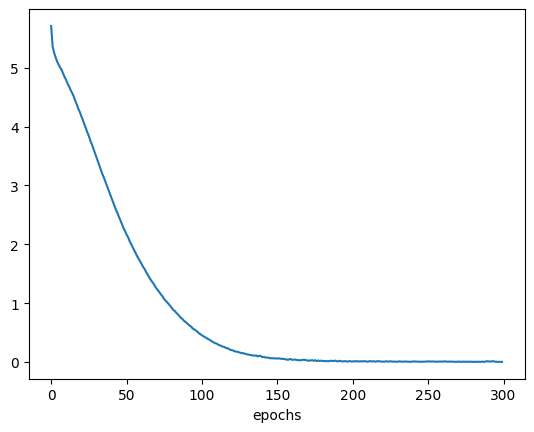

In [27]:
plt.plot(epoch_losses)
plt.xlabel("epochs")


In [28]:
from sklearn.manifold import TSNE

def plot_embeddings(word_embeddings, vocab=vocab):
    tsne = TSNE(n_components=2, random_state=0)
    word_embeddings_2d = tsne.fit_transform(word_embeddings)

    # plot the results with labels from vocab
    plt.figure(figsize=(15,15))
    for i, word in enumerate(vocab.get_itos()):
        plt.scatter(word_embeddings_2d[i,0], word_embeddings_2d[i,1])
        plt.annotate(word, word_embeddings_2d[i,0], word_embeddings_2d[i,1])
    
    plt.xlabel("t-SNE component 1")
    plt.ylabel("t-SNE component 2")
    plt.title("Word embedding visualized with TSNE")
    plt.show()

